# Top 100 Songs & Lyrics By Year 1959 - 2023 (USA)

---

Source link: https://www.kaggle.com/datasets/brianblakely/top-100-songs-and-lyrics-from-1959-to-2019

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
data = pd.read_csv('data/all_songs_data_processed.csv')
data

,Album,Album URL,Artist,Featured Artists,Lyrics,Media,Rank,Release Date,Song Title,Song URL,Writers,Year,Verbs,Nouns,Adverbs,Corpus,Word Counts,Unique Word Counts
0,Battle of New Orleans,https://genius.com/albums/Johnny-horton/Battle-of-new-orleans,Johnny Horton,[],"In 1814 we took a little trip Along with Colonel Jackson down the mighty Mississip We took a little bacon and we took a little beans And we caught the bloody British in a town near New Orleans We fired our guns and the British kept a-comin' There wasn't nigh as many as there was a while ago We fired once more and they begin to runnin' On down the Mississippi to the Gulf of Mexico We looked down a river (Hut-two) And we see'd the British come (Three-four) And there must have been a hundred of'em (Hut-two) Beatin' on the drums (Three-four) They stepped so high (Hut-two) And they made their bugles ring (Three-four) We stood beside our cotton bales (Hut-two) And didn't say a thing (Two-three-four) We fired our guns and the British kept a-comin' There wasn't nigh as many as there was a while ago We fired once more and they begin to runnin' On down the Mississippi to the Gulf of Mexico Old Hickory said we could take 'em by surprise (One-hut, two-three-four) If we didn't fire our muskets (One-hut, two-three-four) 'Till we looked 'em in the eye (One-hut, two-three-four) We held our fire (Hut, two-three-four) 'Till we see their faces well Then we opened up our squirrel guns And really gave 'em - well we Fired our guns and the British kept a-comin' There wasn't nigh as many as there was a while ago We fired once more and they begin to runnin' On down the Mississippi to the Gulf of Mexico Yeah, they ran through the briars (One-hup-two) And they ran through the brambles (Hup-two-three-four) And they ran through the bushes (Hup-two) Where the rabbit couldn't go (Hup-two-three-four) They ran so fast (Hup-two) That the hounds couldn't catch 'em (One-two-three-four) On down the Mississippi to the Gulf of Mexico (One-two, hup-two-three-four) We fired our cannon 'til the barrel melted down So we grabbed an alligator and we fired another round We filled his head with cannon balls, and powdered his behind And when we touched the powder off the gator lost his mind We fired our guns and the British kept a-comin' There wasn't nigh as many as there was a while ago We fired once more and they begin to runnin' On down the Mississippi to the Gulf of Mexico Yeah, they ran through the briars (Hup-one-two) And they ran through the brambles (One-two-three-four) And they ran through the bushes (Hup-two) Where the rabbit couldn't go (Hup-two-three-four) They ran so fast (Hup-two) That the hounds couldn't catch 'em (One-two-three-four) On down the Mississippi to the Gulf of Mexico","[{'native_uri': 'spotify:track:0dwpdcQkeZqpuoAPYD49N3', 'provider': 'spotify', 'type': 'audio', 'url': 'https://open.spotify.com/track/0dwpdcQkeZqpuoAPYD49N3'}, {'provider': 'youtube', 'start': 0, 'type': 'video', 'url': 'http://www.youtube.com/watch?v=VL7XS_8qgXM'}]",1,1959-04-01,The Battle Of New Orleans,https://genius.com/Johnny-horton-the-battle-of-new-orleans-lyrics,"[{'api_path': '/artists/561913', 'header_image_url': 'https://images.genius.com/641ca05661977b0309ebffc9507f2baf.202x202x1.jpg', 'id': 561913, 'image_url': 'https://images.genius.com/641ca05661977b0309ebffc9507f2baf.202x202x1.jpg', 'is_meme_verified': False, 'is_verified': False, 'name': 'Jimmy Driftwood', 'url': 'https://genius.com/artists/Jimmy-driftwood'}]",1959.0,take take take catch fire keep be be fire begin runnin look see'd come step make stand say fire keep be be fire begin runnin say take fire look hold see open give fire keep be be fire begin runnin run run run go run catch fire melt grab fire fill powder touch lose fire keep be be fire begin runnin run run run go run catch,trip bacon bean town gun comin while river of'em drum bugle ring cotton bale thing gun comin while surprise hut musket hut eye hut fire face squirrel gun gun comin while 

### What the code does

- **`corpus = data['Lyrics'].dropna().astype(str).tolist()`**  
  Extracts the *Lyrics* column, removes missing values, converts everything to strings, and stores all lyrics as a list.

- **`vectorizer = TfidfVectorizer(...)`**  
  Creates a TF-IDF vectorizer with:
  - Only alphabetic tokens with 4+ letters (`token_pattern`).
  - English stopword removal.
  - Exclusion of very common terms (`max_df=0.1`).
  - Exclusion of very rare terms (`min_df=3`).

- **`x = vectorizer.fit_transform(corpus)`**  
  Learns the vocabulary and transforms all lyrics into a sparse TF-IDF matrix.

- **`vectorizer.get_feature_names_out()`**  
  Returns the final list of words included in the TF-IDF vocabulary.

---

### Why we do it

We convert raw text (song lyrics) into numerical features suitable for machine learning and NLP tasks. TF-IDF helps keep important, discriminative words while filtering noise, overly common words, and extremely rare words.

---

### Expected outcome

- A sparse TF-IDF matrix `x` where each row is a lyric and each column is a meaningful word.  
- A clean, filtered vocabulary obtained from `get_feature_names_out()`.


In [67]:
data['Unique Word Counts'].mean()

np.float64(131.41147488874762)

In [68]:
corpus = data['Lyrics'].dropna().astype(str).tolist()
albums = data['Album'].dropna().astype(str).tolist()

In [69]:
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b[a-zA-Z]{4,}\b', 
                             stop_words='english', 
                             max_df=0.1,
                             min_df=3)

x = vectorizer.fit_transform(corpus)

vectorizer.get_feature_names_out()

array(['aaaaaaaah', 'aaaah', 'aaah', ..., 'zoom', 'zoovier', 'zoowap'],
      shape=(9716,), dtype=object)

In [70]:
x.toarray().shape

(6271, 9716)

### What the code does

- **`df = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())`**  
  Converts the sparse TF-IDF matrix into a dense NumPy array and builds a pandas DataFrame where:
  - Each **row** represents one lyric.
  - Each **column** represents one TF-IDF feature (a word).
  - Each **cell** contains the TF-IDF weight of that word in that lyric.

- **`df`**  
  Displays the resulting DataFrame.

---

### Why we do it

Transforming the sparse matrix into a DataFrame makes it easier to inspect, analyze, export, or visualize the TF-IDF data. It also allows direct use of pandas operations for further analysis.

---

### Expected outcome

A DataFrame with shape **(number_of_lyrics × number_of_features)**, containing all TF-IDF values for the processed lyrics. Each column name corresponds to a word from the TF-IDF vocabulary.


In [71]:
df = pd.DataFrame(
    x.toarray(),
    columns=vectorizer.get_feature_names_out()
)

df

,aaaaaaaah,aaaah,aaah,aaliyah,abandoned,abcs,abide,ability,ablaze,able,...,zieh,zillion,zimmerman,zipper,zombie,zombies,zone,zoom,zoovier,zoowap
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### What the code does

- **`normalizer = Normalizer()`**  
  Creates a Normalizer object that scales each sample (each lyric vector) to have unit norm.

- **`x_scaler = normalizer.fit_transform(x)`**  
  Applies normalization to the TF-IDF matrix.  
  Each row vector is transformed so that its magnitude (L2 norm) becomes 1.

- **`x_scaler`**  
  The normalized version of the TF-IDF matrix.

---

### Why we do it

Normalization ensures that all lyrics have equal vector length, preventing longer texts from dominating distance-based methods (e.g., KMeans, cosine similarity). It makes comparisons between lyrics more consistent.

---

### Expected outcome

A new matrix where each lyric vector has the same norm (typically 1). This prepares the data for clustering, similarity search, or other algorithms sensitive to vector magnitude.


In [72]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
x_scaler = normalizer.fit_transform(x)

x_scaler

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 246445 stored elements and shape (6271, 9716)>

### What the code does

- **`svd = TruncatedSVD(n_components=2, random_state=42)`**  
  Creates a Truncated SVD model that reduces the dimensionality of the TF-IDF matrix down to **2 components**.

- **`x_svd = svd.fit_transform(x_scaler)`**  
  Fits the SVD model on the normalized TF-IDF matrix and transforms all samples into a 2-dimensional representation.

- **`x_svd`**  
  Contains the 2D coordinates of each lyric after dimensionality reduction.

---

### Why we do it

High-dimensional TF-IDF vectors cannot be visualized directly.  
Truncated SVD (a.k.a. LSA — Latent Semantic Analysis):

- captures the main semantic structure of the text,
- compresses thousands of features into just 2 latent dimensions,
- enables visualization and clustering in lower dimensions.

---

### Expected outcome

A 2-column matrix where each row represents one lyric projected into a low-dimensional semantic space. This allows plotting and analyzing relationships between lyrics visually.


In [73]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, random_state=42)
x_svd = svd.fit_transform(x_scaler)
x_svd

array([[ 0.05945111, -0.00259502],
       [ 0.1060279 , -0.00846724],
       [ 0.04458504, -0.0150377 ],
       ...,
       [ 0.16626751,  0.25474459],
       [ 0.07537704,  0.16471229],
       [ 0.08383731, -0.01133139]], shape=(6271, 2))

### What the code does

- **`kmeans = KMeans(n_clusters=5, random_state=42)`**  
  Initializes a K-Means clustering model that will form **5 clusters**.

- **`labels = kmeans.fit_predict(x_svd)`**  
  Fits the K-Means model on the 2D SVD-transformed lyric vectors and assigns each lyric to one of the 5 clusters.

- **`labels`**  
  An array of cluster labels (0–4), one for each lyric.

---

### Why we do it

After reducing the lyrics to 2 semantic dimensions, K-Means can group them based on similarity. The idea is to discover potential themes, styles, or patterns in the lyrics.

---

### Expected outcome

An array where each entry indicates the cluster assignment of a lyric.  
These labels can later be visualized or analyzed to understand group differences.


In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)

labels = kmeans.fit_predict(x_svd)

labels

array([3, 4, 3, ..., 2, 2, 4], shape=(6271,), dtype=int32)

### What the code does

- **`inertia = []`**  
  Creates an empty list to store the inertia values.

- **Loop `for k in range(2, 11):`**  
  Iterates through cluster counts from **2 to 10**.

- **`km = KMeans(n_clusters=k, random_state=42)`**  
  Initializes a K-Means model for the current value of *k*.

- **`km.fit(x_svd)`**  
  Fits K-Means to the 2D SVD-transformed data.

- **`inertia.append(km.inertia_)`**  
  Saves the inertia (sum of squared distances to cluster centers) for that *k*.

- **`inertia`**  
  Contains inertia values for k = 2 to 10.

---

### Why we do it

This is the **Elbow Method**.  
We calculate inertia for multiple cluster numbers to find where the decrease in inertia slows down — the “elbow point.” This helps identify the optimal number of clusters.

---

### Expected outcome

A list of inertia values that typically decrease as *k* increases.  
These values are later plotted to visually choose the best number of clusters.


In [75]:
inertia = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_svd)
    inertia.append(km.inertia_)

inertia

[24.045753271999747,
 14.867442940818977,
 11.313433389879428,
 9.180877358123004,
 7.667823629839896,
 6.599272665220632,
 5.893386510141152,
 5.171776418030032,
 4.770465614362524]

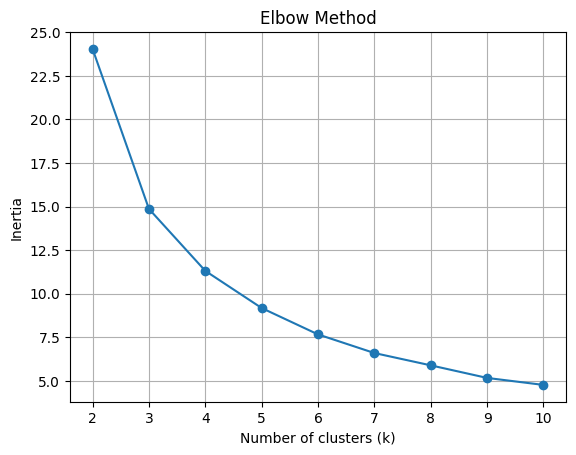

In [76]:
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

### What the code does

- **`plt.figure(figsize=(8,6))`**  
  Creates a new plot with a defined size.

- **`plt.scatter(x_svd[:, 0], x_svd[:, 1], c=labels)`**  
  Plots each lyric as a point in 2D space using the SVD components:
  - `x_svd[:, 0]` → x-axis  
  - `x_svd[:, 1]` → y-axis  
  - `c=labels` → point color depends on the cluster assignment.

- **Axis labels and title**  
  Adds text to make the plot readable.

- **`plt.show()`**  
  Displays the scatter plot.

---

### Why we do it

This visualizes how the lyrics are distributed in the 2-dimensional semantic space and how K-Means has grouped them. It helps verify whether clusters form meaningful or well-separated groups.

---

### Expected outcome

A scatter plot where:
- Each point is a lyric,
- Colors represent different clusters,
- Patterns or group separations can be visually inspected.


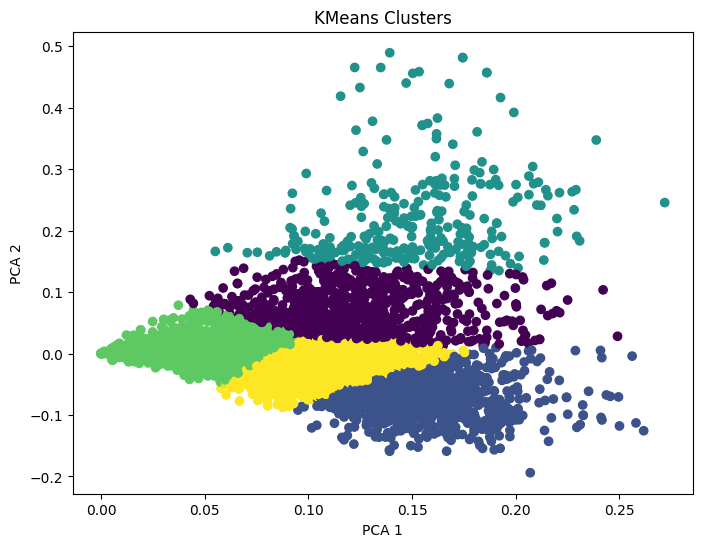

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(
    x_svd[:, 0],
    x_svd[:, 1],
    c=labels
)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clusters')
plt.show()

In [78]:
np.bincount(labels)

array([ 854, 1148,  299, 1764, 2206])

### What the code does

#### **`songs_in_cluster(clusterId)`**
- Builds a list of lyrics (`corpus[i]`) that belong to a specific cluster.
- Checks each index and keeps only those where `labels[i] == clusterId`.

**Result:** returns all songs assigned to a given cluster.

---

#### **`top_words(cluster_id)`**
1. **Select indices of samples in the cluster:**  
   ```python
   indices = [i for i in range(len(labels)) if labels[i] == cluster_id]

In [79]:
def songs_in_cluster(clusterId):
    songs_in_cluster_id = [corpus[i] for i in range(len(corpus)) if labels[i] == clusterId]
    
    return songs_in_cluster_id

In [80]:
def album_name(clusterId):
    album_list = [albums[i] for i in range(len(albums)) if labels[i] == clusterId]
    
    return album_list

In [81]:
def top_words(cluster_id):
    indices = [i for i in range(len(labels)) if labels[i] == cluster_id]
    
    tfidf_rows = x[indices]   
    
    mean_tfidf = tfidf_rows.mean(axis=0)
    
    top_idx = np.asarray(mean_tfidf).ravel().argsort()[::-1][:50]
    
    feature_names = vectorizer.get_feature_names_out()
    
    topWords = [feature_names[i] for i in top_idx]
    
    return topWords

### What the code does

#### **1. Build a dictionary of top words for each cluster**
```python
top_words_dict = {}

for i in range(5):
    top_words_dict[f"cluster {i}"] = top_words(i)


In [82]:
top_words_dict = {}

for i in range(5):
    top_words_dict[f"cluster {i}"] = top_words(i)

In [83]:
top_words_df = pd.DataFrame({
    'Cluster 0': top_words_dict['cluster 0'],
    'Cluster 1': top_words_dict['cluster 1'],
    'Cluster 2': top_words_dict['cluster 2'],
    'Cluster 3': top_words_dict['cluster 3'],
    'Cluster 4': top_words_dict['cluster 4']
})
top_words_df

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,money,forever,dance,instrumental,walk
1,everybody,lonely,nigga,round,help
2,body,remember,shake,wild,light
3,girls,whoa,shit,ride,people
4,rock,dream,bitch,goes,blue
5,party,live,niggas,boogie,babe
6,dance,sweet,fuck,everybody,somebody
7,shit,fall,money,boom,sweet
8,fuck,didn,rock,work,talk
9,nigga,loving,bitches,honey,woman


In [92]:
print(album_name(0))

['“Mr Personality’s” 15 Big Hits', 'Songs By Ricky', 'The Greatest Songs of the Fifties', 'The Best of Rosie & The Originals', 'All The Way', 'Cruisin’ 1962', 'Doin’ the Twist at the Peppermint Lounge', 'Greatest Hits', 'Gene Pitney Sings World Wide Winners', 'Peter, Paul and Mary', 'Cruisin’ 1963', 'The Impressions', 'Heat Wave', 'Ingredients In A Recipe For Soul', 'From a Jack to a King', 'My Son, The Nut', 'The Manfred Mann Album', 'Please Please Me', 'Cruisin’ 1964', 'It Hurts to Be in Love and Eleven More Hit Songs', 'The Animals (US Version)', 'The Dave Clark Five vs Peter & Gordon', 'Roger and Out', 'The In Crowd', 'Just Once in My Life', 'A Session With Gary Lewis and the Playboys', 'One Thousand Six Hundred Sixty-One Seconds with Del Shannon', 'And Then... Along Comes the Association', 'The Monkees', 'If You Can Believe Your Eyes and Ears', 'Sunshine Superman', 'The Complete Motown Singles | Vol. 6: 1966', 'Solo', 'Little Bit O’ Soul', 'Sweet Soul Music', 'Soul Men', 'Surreali

In [94]:
data[data['Album'] == "Songs By Ricky"]

,Album,Album URL,Artist,Featured Artists,Lyrics,Media,Rank,Release Date,Song Title,Song URL,Writers,Year,Verbs,Nouns,Adverbs,Corpus,Word Counts,Unique Word Counts
70,Songs By Ricky,https://genius.com/albums/Ricky-nelson/Songs-by-ricky,Ricky Nelson,[],"Sometimes I think I love you Ah, just a little too much You know you thrill me baby With your magic touch That's why I want you, honey And love you like I do I'm gonna scream and shout it There ain't no doubt about it That's why I love you like I do Well, sometimes I think you kiss me Ah, just a little too much You drive me crazy, baby With your magic touch You make me feel so good When the moon is shining bright With our lips together And you're squeezing me so tight Well, I went steady once before Thought I loved the girl next door She stepped out on me you see Couldn't be true Well, I got over all my dreams Time went by so fast it seems Now I know I'll never get over you Oh now... Sometimes I think I love you Ah, just a little too much You know you thrill me baby With your magic touch That's why I want you honey And love you like I do I'm gonna scream and shout it There ain't no doubt about it That's why I love you like I do Yeah, that's why I love you like I do",[],78,NaN,Just A Little Too Much,https://genius.com/Ricky-nelson-just-a-little-too-much-lyrics,"[{'api_path': '/artists/363749', 'header_image_url': 'https://images.genius.com/349be3d3821a25addf87f4ac44f1d7a2.200x200x1.jpg', 'id': 363749, 'image_url': 'https://images.genius.com/349be3d3821a25addf87f4ac44f1d7a2.200x200x1.jpg', 'is_meme_verified': False, 'is_verified': False, 'name': 'Dorsey Burnette', 'url': 'https://genius.com/artists/Dorsey-burnette'}]",1959.0,think love know thrill want love go scream shout be love do think kiss drive make feel shine squeeze go love step see get go seem know get think love know thrill want love go scream shout be love do love do,baby touch honey doubt baby touch moon lip girl door dream baby touch honey doubt,sometimes just too much no well sometimes just too much so together so once so fast now never now sometimes just too much no,think love ah little know thrill baby magic touch want honey love like go to scream shout be doubt love like think kiss ah little drive crazy baby magic touch feel good moon shine bright lip squeeze tight go steady Thought love girl door step true get dream Time go fast know oh think love ah little know thrill baby magic touch want honey love like go to scream shout be doubt love like yeah love like,208,94
74,Songs By Ricky,https://genius.com/albums/Ricky-nelson/Songs-by-ricky,Ricky Nelson,[],"I could never be loved by anyone sweeter than you And I could never belong to anyone sweeter than you With you to stand beside me I'll never be alone And what more could I long for than to have you for my own My only desire is loving you eternally For no, no other love could ever mean so much to me So if you say you love me forever I'll be true And what more could I long for than to live my life with you I could never be loved by anyone sweeter than you And I could never belong to anyone sweeter than you",[],83,NaN,Sweeter Than You,https://genius.com/Ricky-nelson-sweeter-than-you-version-1-lyrics,[],1959.0,love belong stand long have love mean say love long live love belong,desire no love life,never never never eternally ever so much so forever never never,love sweet belong sweet stand long desire love eternally love mean love forever true long live life love sweet belong sweet,108,49
